In [1]:
from kriging_3D import *
import numpy as np



number_of_point: 2
noise: 0


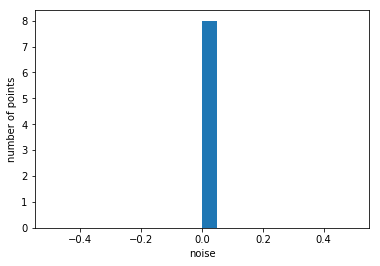

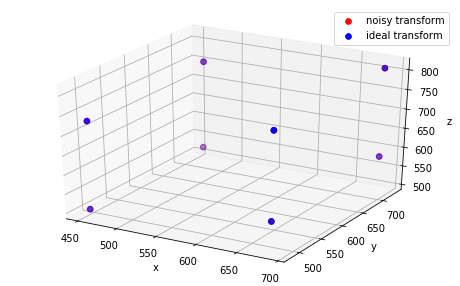

theta: [1.00000000e+00 1.00000118e-05 1.00000500e-05]
pl: [2. 2. 2.]

build time: 0 0.490048885345459

predict time: 0 0.002000093460083008
theta: [1.85941305e-02 1.00000000e+00 1.00000000e-05]
pl: [2. 2. 2.]

build time: 1 0.42104220390319824

predict time: 1 0.002000093460083008
theta: [1.e-05 1.e-05 1.e+00]
pl: [2. 2. 2.]

build time: 2 0.4090409278869629

predict time: 2 0.002000093460083008


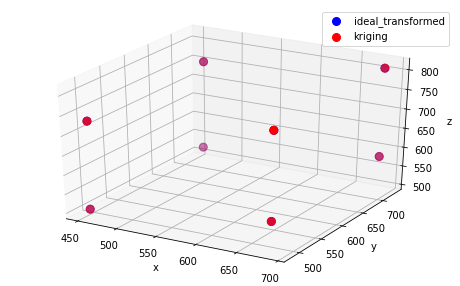

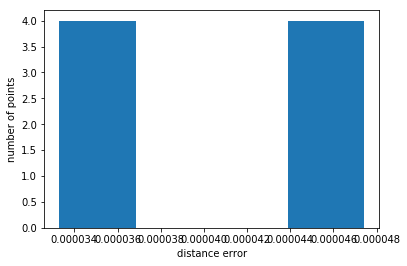

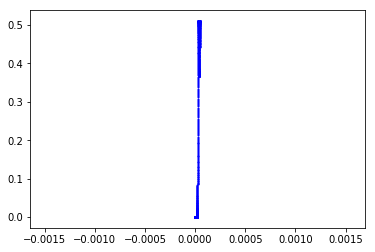

find_circ, z: 508.0204121105523
find_circ, z: 729.6197717067053
find_circ, z: 551.8650263000713
find_circ, z: 773.4944159265262
find_circ, z: 541.4551754205027
find_circ, z: 763.0845650466856
find_circ, z: 585.3298196396439
find_circ, z: 806.9592092659627

without image simulation
theta: [1.00000000e+00 1.00001122e-05 1.00037016e-05]
pl: [2. 2. 2.]

build time: 0 0.4310429096221924

predict time: 0 1.5431544780731201
theta: [1.00000040e-05 1.00000000e+00 1.00000134e-05]
pl: [2. 2. 2.]

build time: 1 0.3890388011932373

predict time: 1 1.5521552562713623
theta: [1.00000028e-05 1.00000041e-05 1.00000000e+00]
pl: [2. 2. 2.]

build time: 2 0.37603759765625

predict time: 2 1.580157995223999


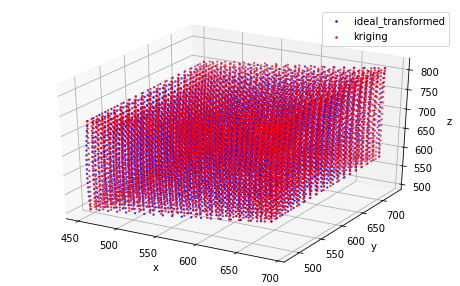

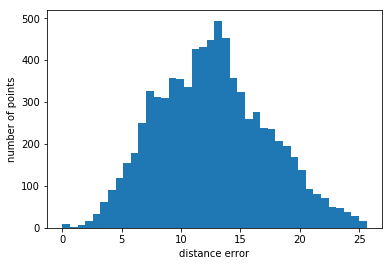

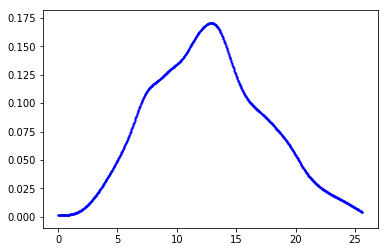

In [2]:
## initial 8 to 64 f(x,y,z)=z kriging for auto focus
import time

size_of_img = 500

##############################################################
# generate 8 points for guessing z coords of the 64 points
error_input=[]
error_wo_sim=[]
error_w_sim=[]
build_time=[]
pred_time=[]

noises=[0]
number_of_points=[2]

for i in range(np.shape(number_of_points)[0]):
    error_input.append([])
    error_wo_sim.append([])
    build_time.append([])
    pred_time.append([])
    number_of_pt=number_of_points[i]
    for j in range(np.shape(noises)[0]):
#         start = time.time()
        noise=noises[j]
        print('\n\nnumber_of_point: '+str(number_of_pt))
        print('noise: '+str(noise))
        
        imaging_8, camera_8_noisy , camera_8_ideal = generate_points_3D(number_of_point = 2, noise_percentage = noise) 
        imaging_64, camera_64_noisy , camera_64_ideal = generate_points_3D(number_of_point=number_of_pt, noise_percentage = noise, show=True)
        # record actual input noise
        if noise != 0:
            input_kde=distance_error_kde(camera_64_noisy,camera_64_ideal,show=False)
            error_input[i].append(input_kde[0][np.argmax(input_kde[1])])
        else:
            error_input[i].append(0)
        
        initial_guess = kriging_3D_predict(imaging_8, camera_8_noisy, imaging_64, camera_64_ideal, show=64)
        
        fine_camera_64 = scan_points(initial_guess, camera_64_noisy)
        
        # apply kriging and do a fine fitting
        imaging_8000, camera_8000_noisy , camera_8000_ideal = generate_points_3D(number_of_point=20, noise_percentage = 0)
        print('\nwithout image simulation')
        fine_predict_wo_sim = kriging_3D_predict(imaging_64, camera_64_noisy, imaging_8000,camera_8000_ideal, show=2)
        output_kde=distance_error_kde(fine_predict_wo_sim,camera_8000_ideal,show=False)
        error_wo_sim[i].append(output_kde[0][np.argmax(output_kde[1])])
        
    #     print('\nwith image simulation')
    #     fine_predict_w_sim = kriging_3D_predict(imaging_64, fine_camera_64, imaging_8000,camera_8000_ideal, show=2)
    #     error_w_sim.append(distance_error_kde(fine_predict_w_sim,camera_8000_ideal,show=False))

# #################
# # error KDE (histogram) of different noise level in one graph
# error_wo_sim = np.array(error_wo_sim)
# error_w_sim = np.array(error_w_sim)
# n=np.shape(noises)[0]

# color=iter(plt.cm.rainbow(np.linspace(0,1,n)))
# for i in range(1,n):
#     plt.scatter(error_input[i][0],error_input[i][1],c=[next(color)],s=1,label='noise: '+str(int(noises[i]*100))+'%')
# plt.xlabel('distance noise (input)')
# plt.ylabel('Kernel Density (KDE)')
# plt.legend()
# plt.show()

# color=iter(plt.cm.rainbow(np.linspace(0,1,n)))
# for i in range(n):
#     plt.scatter(error_wo_sim[i][0],error_wo_sim[i][1],c=[next(color)],s=1,label='noise: '+str(int(noises[i]*100))+'%')
# plt.xlabel('distance error (output)')
# plt.ylabel('Kernel Density (KDE)')
# plt.legend()
# plt.show()

# # for i in range(n):
# #     plt.scatter(error_w_sim[i][0],error_w_sim[i][1],c=[next(color)],s=1,label='noise: '+str(int(noises[i]*100))+'%')
# # plt.xlabel('distance error (output)')
# # plt.ylabel('Kernel Density (KDE)')
# # plt.legend()
# # plt.show()





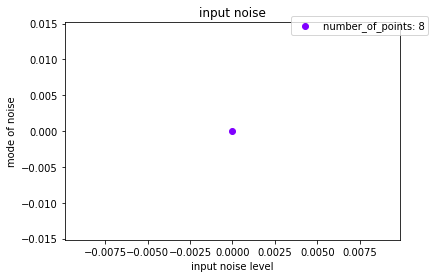

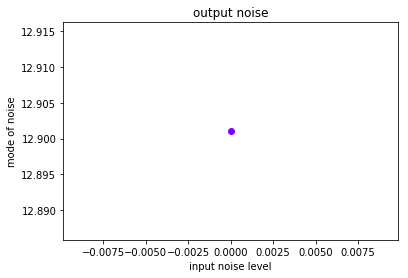

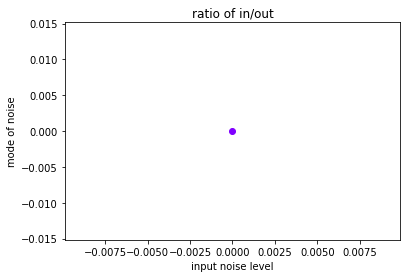

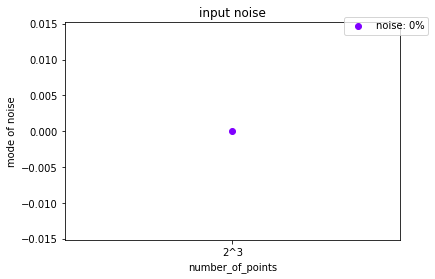

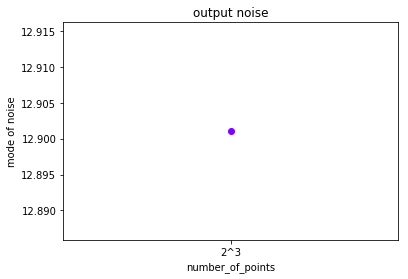

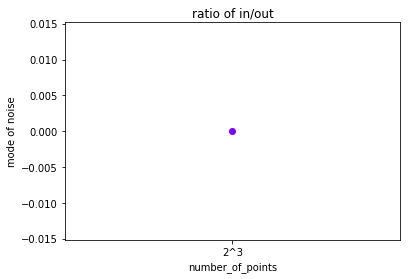

IndexError: index 0 is out of bounds for axis 0 with size 0

In [3]:
ratio=np.divide(error_input,error_wo_sim)
color=iter(plt.cm.rainbow(np.linspace(0,1,np.shape(number_of_points)[0])))
for i in range(np.shape(number_of_points)[0]):
#     for j in range(np.shape(noises)[0]):
    plt.scatter(noises,error_input[i],c=[next(color)],label='number_of_points: '+str(int(number_of_points[i]**3)))
plt.xlabel('input noise level')
plt.ylabel('mode of noise')
plt.title('input noise')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

color=iter(plt.cm.rainbow(np.linspace(0,1,np.shape(number_of_points)[0])))
for i in range(np.shape(number_of_points)[0]):
#     for j in range(np.shape(noises)[0]):
    plt.scatter(noises,error_wo_sim[i],c=[next(color)],label='number_of_points: '+str(int(number_of_points[i]**3)))
plt.xlabel('input noise level')
plt.ylabel('mode of noise')
plt.title('output noise')
# plt.legend()
plt.show()

color=iter(plt.cm.rainbow(np.linspace(0,1,np.shape(number_of_points)[0])))
for i in range(np.shape(number_of_points)[0]):
#     for j in range(np.shape(noises)[0]):
    plt.scatter(noises,ratio[i],c=[next(color)],label='number_of_points: '+str(int(number_of_points[i]**3)))
plt.xlabel('input noise level')
plt.ylabel('mode of noise')
plt.title('ratio of in/out')
# plt.legend()
plt.show()
#####################################################
error_input=np.array(error_input)
error_wo_sim=np.array(error_wo_sim)
ratio=np.array(ratio)
build_time=np.array(build_time)
pred_time=np.array(pred_time)


color=iter(plt.cm.rainbow(np.linspace(0,1,np.shape(number_of_points)[0])))
for i in range(np.shape(noises)[0]):
    plt.scatter(number_of_points,error_input.T[i],c=[next(color)],label='noise: '+str(int(noises[i]*100))+'%')
plt.xlabel('number_of_points')
plt.ylabel('mode of noise')
plt.title('input noise')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(number_of_points, ['2^3','3^3','4^3','5^3','6^3','7^3','8^3',])
plt.show()

color=iter(plt.cm.rainbow(np.linspace(0,1,np.shape(number_of_points)[0])))
for i in range(np.shape(noises)[0]):
    plt.scatter(number_of_points,error_wo_sim.T[i],c=[next(color)],label='noise: '+str(int(noises[i]*100))+'%')
plt.xlabel('number_of_points')
plt.ylabel('mode of noise')
plt.title('output noise')
plt.xticks(number_of_points, ['2^3','3^3','4^3','5^3','6^3','7^3','8^3',])
# plt.legend()
plt.show()

color=iter(plt.cm.rainbow(np.linspace(0,1,np.shape(number_of_points)[0])))
for i in range(np.shape(noises)[0]):
    plt.scatter(number_of_points,ratio.T[i],c=[next(color)],label='noise: '+str(int(noises[i]*100))+'%')
plt.xlabel('number_of_points')
plt.ylabel('mode of noise')
plt.title('ratio of in/out')
plt.xticks(number_of_points, ['2^3','3^3','4^3','5^3','6^3','7^3','8^3',])
# plt.legend()
plt.show()

# run time
color=iter(plt.cm.rainbow(np.linspace(0,1,np.shape(number_of_points)[0])))
for i in range(np.shape(noises)[0]):
    plt.scatter(number_of_points,build_time.T[i],c=[next(color)],label='noise: '+str(int(noises[i]*100))+'%')
#     plt.annotate('(%s)' % run_time.T[i][0], xy=np.array([number_of_points[i],run_time.T[i][0]]), textcoords='data')
plt.xlabel('number_of_points')
plt.ylabel('build_time')
plt.title('build_time')
plt.legend()
plt.xticks(number_of_points, ['2^3','4^3','6^3'])
plt.show()

color=iter(plt.cm.rainbow(np.linspace(0,1,np.shape(number_of_points)[0])))
for i in range(np.shape(noises)[0]):
    plt.scatter(number_of_points,pred_time.T[i],c=[next(color)],label='noise: '+str(int(noises[i]*100))+'%')
#     plt.annotate('(%s)' % run_time.T[i][0], xy=np.array([number_of_points[i],run_time.T[i][0]]), textcoords='data')
plt.xlabel('number_of_points')
plt.ylabel('pred_time')
plt.title('pred_time')
plt.legend()
plt.xticks(number_of_points, ['2^3','4^3','6^3'])
plt.show()

In [ ]:
ratio=np.divide(error_input,error_wo_sim)
print(error_input)
print(error_wo_sim)
print(ratio)

# plt.figure(figsize=(4,4))
plt.imshow(error_input)
plt.colorbar()
plt.xlabel('input noise level')
plt.ylabel('number of points')
plt.title('input noise')
plt.xticks(range(np.shape(noises)[0]), noises)
plt.yticks(range(np.shape(number_of_points)[0]), number_of_points)
plt.show()

plt.imshow(error_wo_sim)
plt.colorbar()
plt.xlabel('input noise level')
plt.ylabel('number of points')
plt.title('output noise')
plt.xticks(range(np.shape(noises)[0]), noises)
plt.yticks(range(np.shape(number_of_points)[0]), number_of_points)
plt.show()

plt.imshow(ratio)
plt.colorbar()
plt.xlabel('input noise level')
plt.ylabel('number of points')
plt.title('ratio of in/out')
plt.xticks(range(np.shape(noises)[0]), noises)
plt.yticks(range(np.shape(number_of_points)[0]), number_of_points)
plt.show()